# Regression Week 1: Simple Linear Regression Assignment

Predicting House Prices (One feature)

In this notebook we will use data on house sales in King County, where Seattle is located, to predict house prices using simple (one feature) linear regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Part 0.

Import the training and test data

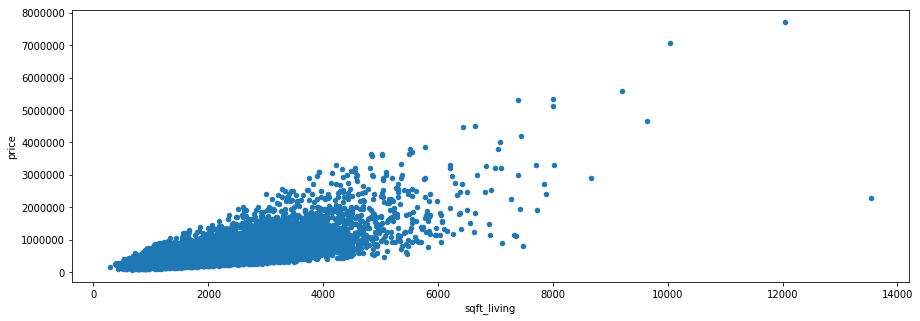

In [2]:
dtype_dict = {
    'bathrooms':float, 
    'waterfront':int, 
    'sqft_above':int, 
    'sqft_living15':float, 
    'grade':int, 
    'yr_renovated':int, 
    'price':float, 
    'bedrooms':float, 
    'zipcode':str,
    'long':float,
    'sqft_lot15':float, 
    'sqft_living':float, 
    'floors':str,
    'condition':int,
    'lat':float,
    'date':str,
    'sqft_basement':int, 
    'yr_built':int,
    'id':str,
    'sqft_lot':int,
    'view':int
}

train_data = pd.read_csv('kc_house_train_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('kc_house_test_data.csv', dtype=dtype_dict)

fig, ax = plt.subplots(figsize=(15,5))
train_data.plot(kind='scatter', x='sqft_living', y='price', ax=ax)
plt.show()

### Part 1.

Write a generic function that accepts a column of data ‘input_feature’ and another column ‘output’ and returns the Simple Linear Regression parameters ‘intercept’ and ‘slope’. Use the closed form solution from lecture to calculate the slope and intercept

In [3]:
def simple_linear_regression(input_feature, output):
    sum_x = np.sum(input_feature)
    sum_y = np.sum(output)
    sum_xy = np.sum(input_feature * output)
    sum_xx = np.sum(input_feature * input_feature)
    N = len(input_feature)

    slope = (sum_xy - 1/N * sum_x * sum_y) / (sum_xx - 1/N * sum_x * sum_x)
    intercept = 1/N * sum_y - slope * 1/N * sum_x

    return intercept, slope

### Part 2.

Use your function to calculate the estimated slope and intercept on the training data to predict ‘price’ given ‘sqft_living’

In [4]:
squarefeet_intercept, squarefeet_slope = simple_linear_regression(train_data['sqft_living'], train_data['price'])

squarefeet_intercept, squarefeet_slope

(-47116.079072894179, 281.9588396303426)

### Part 3.

Using your Slope and Intercept from, What is the predicted price for a house with 2650 sqft?

In [5]:
def get_regression_predictions(input_feature, intercept, slope):
    return intercept + slope * input_feature

In [6]:
get_regression_predictions(2650, squarefeet_intercept, squarefeet_slope)

700074.84594751371

### Part 4.

Write a function that accepts column of data: ‘input_feature’, and ‘output’ and the regression parameters ‘slope’ and ‘intercept’ and outputs the Residual Sum of Squares (RSS)

In [7]:
def get_residual_sum_of_squares(input_feature, output, intercept,slope):
    return np.sum(np.square(output - get_regression_predictions(input_feature, intercept, slope)))

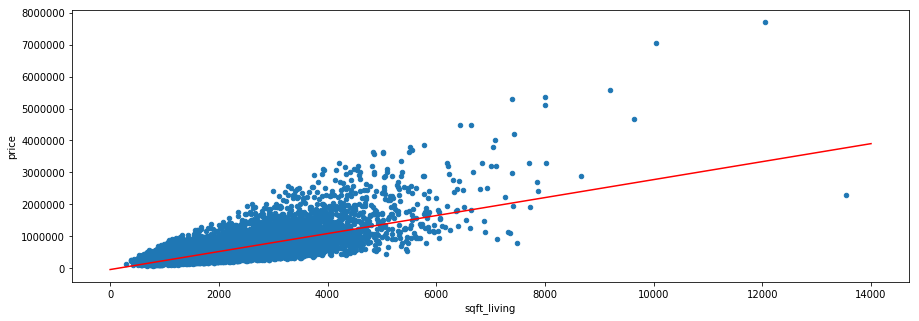

In [8]:
fig, ax = plt.subplots(figsize=(15,5))

train_data.plot(kind='scatter', x='sqft_living', y='price', ax=ax)

ax.plot(np.linspace(0,14000,100), get_regression_predictions(np.linspace(0,14000,100), squarefeet_intercept, squarefeet_slope) , color='r')

plt.show()

### Part 5.

According to this function and the slope and intercept from What is the RSS for the simple linear regression using squarefeet to predict prices on TRAINING data?

In [9]:
get_residual_sum_of_squares(train_data['sqft_living'], train_data['price'],squarefeet_intercept, squarefeet_slope)

1201918354177283.0

### Part 6.

Write a function that accept a column of data:‘output’ and the regression parameters ‘slope’ and ‘intercept’ and outputs the column of data: ‘estimated_input’

In [10]:
def inverse_regression_predictions(output, intercept, slope):
    return (output - intercept) / slope

### Part 7.

According to this function and the regression slope and intercept from (3) what is the estimated square-feet for a house costing $800,000?

In [11]:
inverse_regression_predictions(800000,squarefeet_intercept, squarefeet_slope)

3004.3962451522766

### Part 8.

Instead of using ‘sqft_living’ to estimate prices we could use ‘bedrooms’ (a count of the number of bedrooms in the house) to estimate prices. Using your function from (3) calculate the Simple Linear Regression slope and intercept for estimating price based on bedrooms

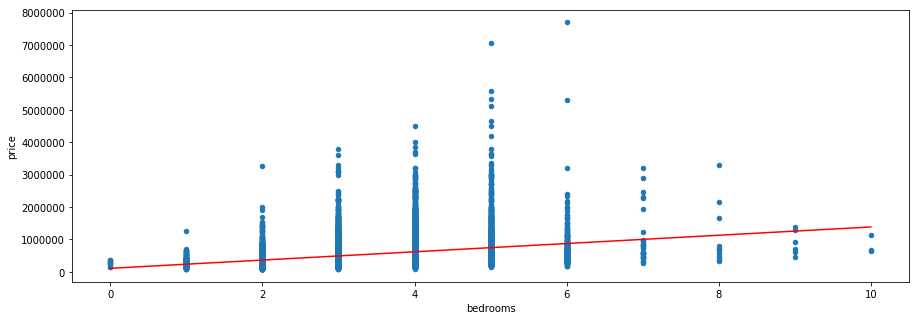

In [12]:
bedrooms_intercept, bedrooms_slope = simple_linear_regression(train_data['bedrooms'], train_data['price'])

fig, ax = plt.subplots(figsize=(15,5))

train_data.plot(kind='scatter', x='bedrooms', y='price', ax=ax)

ax.plot(np.linspace(0,10,100), get_regression_predictions(np.linspace(0,10,100), bedrooms_intercept, bedrooms_slope) , color='r')

plt.show()


### Part 9.

Now that we have 2 different models compute the RSS from BOTH models on TEST data

In [13]:
print(get_residual_sum_of_squares(test_data['sqft_living'], test_data['price'],squarefeet_intercept, squarefeet_slope))
print(get_residual_sum_of_squares(test_data['bedrooms'], test_data['price'],bedrooms_intercept, bedrooms_slope))

2.75402933618e+14
4.9336458596e+14
